In [1]:
# first make the imports (pandas , numpy, matplotlib , seaborn , %matplotlibinline)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# get the data . Read in the Ecommerce Customers csv file as a pandas dataframe called customers.

customers = pd.read_csv('Ecommerce Customers.csv')

In [3]:
# check the head of customers

customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
# check the info of customers

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
# check the describe in customers

customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


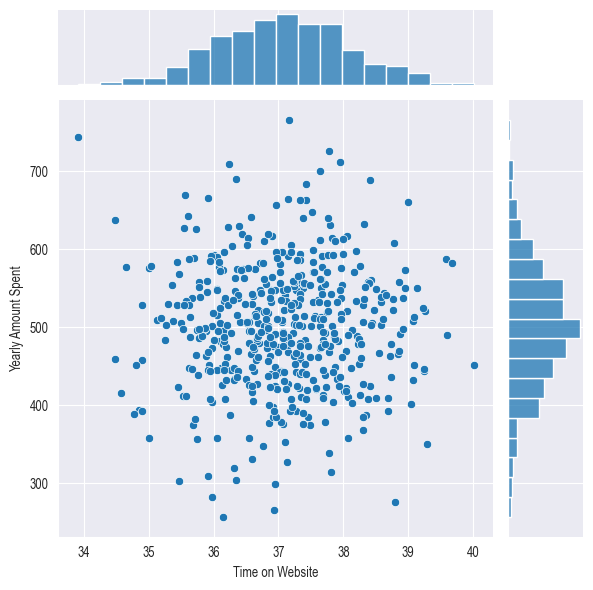

In [7]:
# Exploratory Data analysis. Use seaborn to create joinplot to compare the Time on Website and Yearly Amount Spent columns .Does the correlation make sense?

sns.jointplot(customers, x=customers['Time on Website'], y=customers['Yearly Amount Spent'])


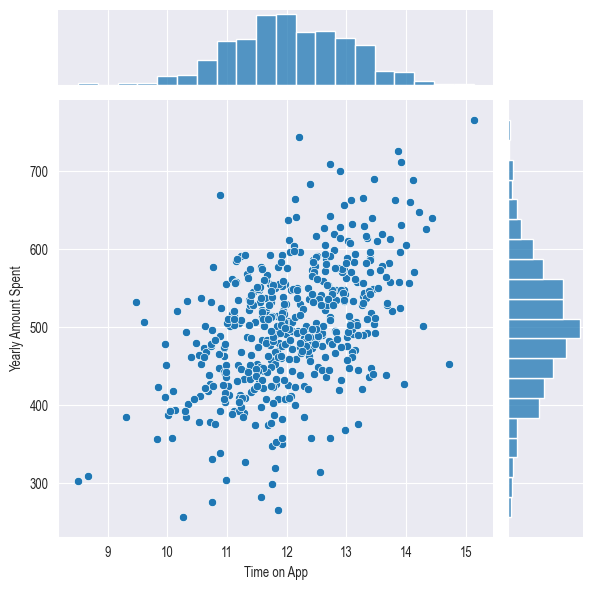

In [8]:
# do the same with the Time on App column instead

sns.jointplot(customers, x=customers['Time on App'], y=customers['Yearly Amount Spent'])

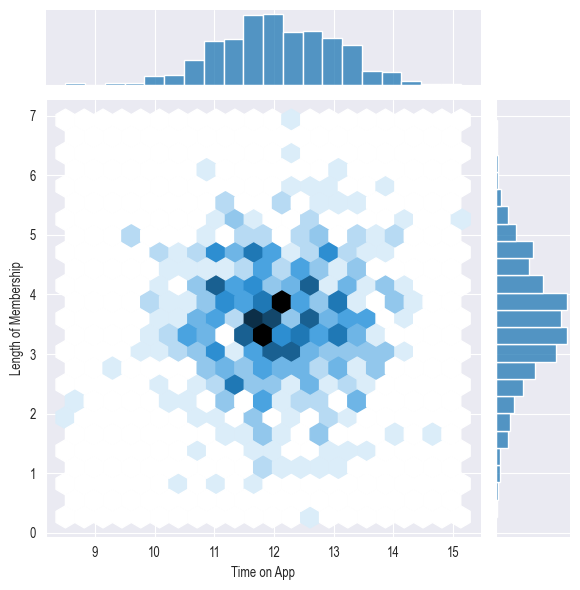

In [9]:
# Use joinplot to create a 2D hex bin plot comparing Time on App and Length of Membership

sns.jointplot(data=customers, x=customers['Time on App'], y=customers['Length of Membership'], kind="hex")

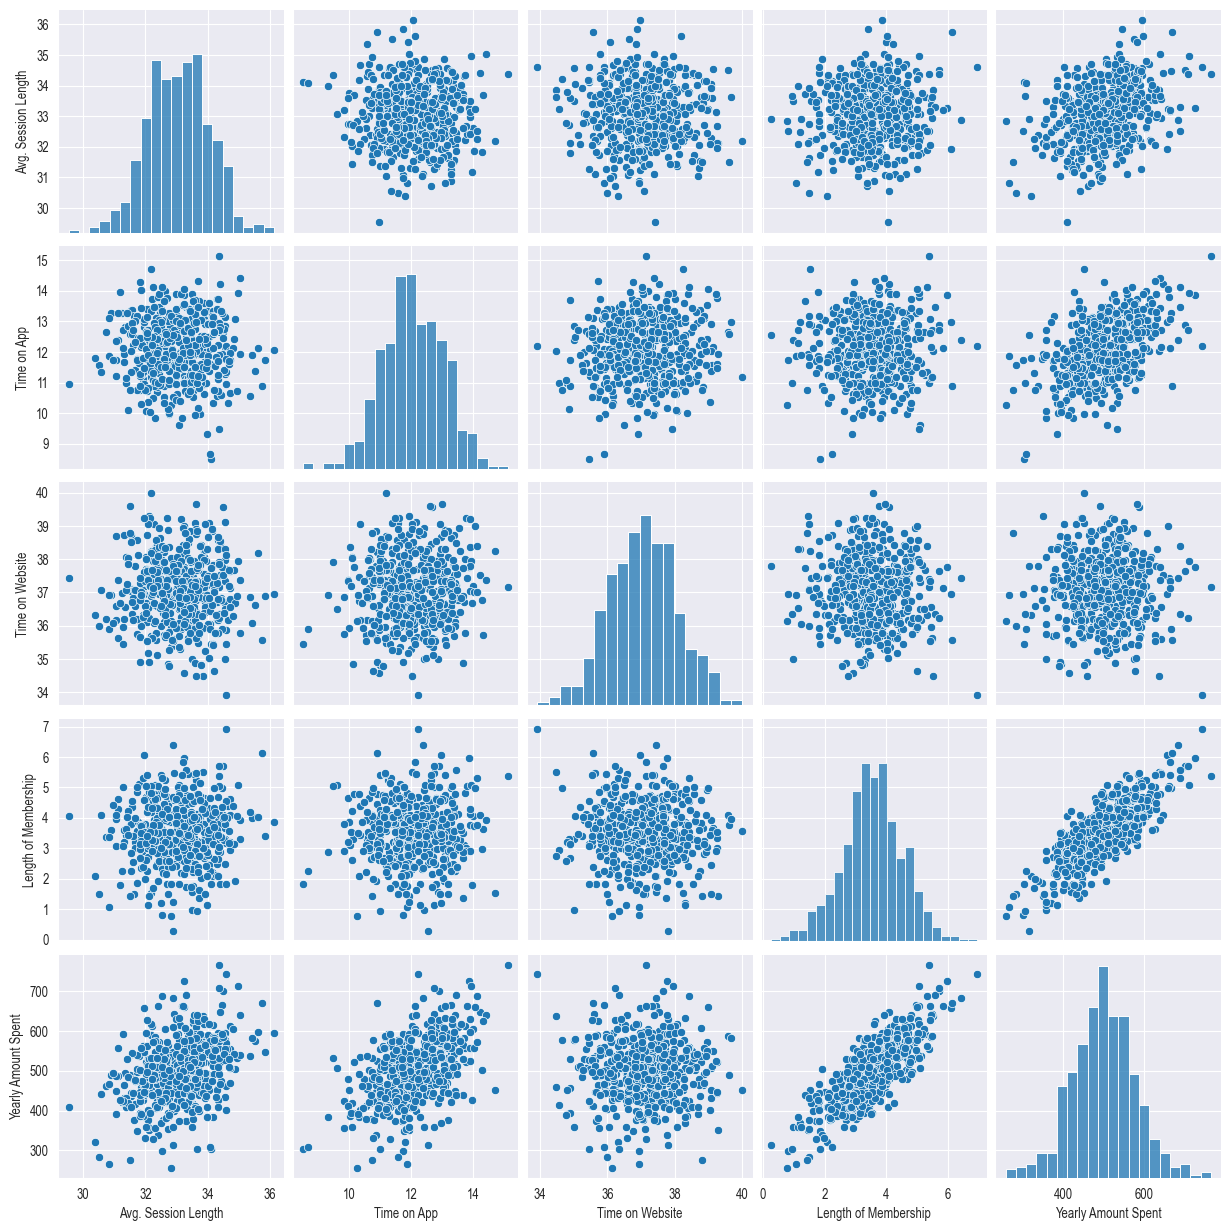

In [11]:
# Lets explore these types of relationships across the entire data set. Use pairplot to recreate the plot

sns.pairplot(data=customers)

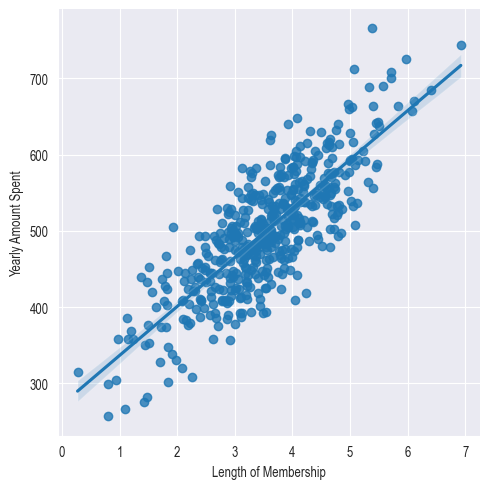

In [22]:
# Create a linear model plot (using seaborns implot) of Yearly Amount Spent vs Length of Membership

sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

In [40]:
# Training and Testing Data
# Set a variable X equal to the numerical features of customers and a variable y equal to the "Yearly Amount Spent" column


X = customers[['Avg. Session Length', 'Time on App',
               'Time on Website', 'Length of Membership']]
y = customers[['Yearly Amount Spent']]

In [41]:
# Use model_validation.train_test_split from sklearn to split the data into training and testing sets. Set test_size = 0.3 and random state = 101

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
# Training the model
# import LinearRegression from sklearn.linear_model

from sklearn.linear_model import LinearRegression

In [38]:
# Create an instance of LinearRegression() model named lm.

lm = LinearRegression()

In [42]:
# Train/fit lm on the training data

lm.fit(X_train, y_train)

LinearRegression()

In [44]:
# print out the coefficients of the model
print(lm.coef_)

[[25.98154972 38.59015875  0.19040528 61.27909654]]


In [46]:
# Predicting Test Data
# Use lm.predict() to predict off the X_test set of the data

predictions = lm.predict(X_test)

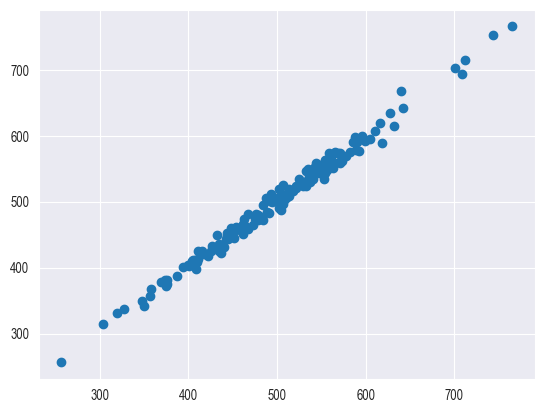

In [48]:
# create a scatterplot of the real test values versus the predicted values

plt.scatter(y_test, predictions)

In [52]:
# Evaluating the model
# Calculate the Mean Absolute Error , Mean Squared Error and the Root Squared Error

from sklearn import metrics

print(
    f"MAE: {metrics.mean_absolute_error(y_test, predictions)} \n MSE: {metrics.mean_squared_error(y_test, predictions)} \n RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions))} ")

MAE: 7.228148653430826 
 MSE: 79.81305165097427 
 RMSE: 8.933815066978624 


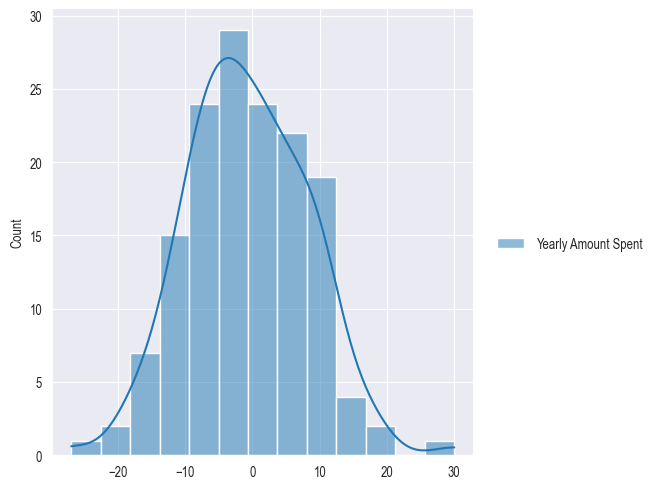

In [59]:
# Residuals
# plot a histogram of th residuals and make sure it looks normally distributed Use either seaborn distplot , or just plt.hist().

sns.displot((y_test - predictions), kde=True)
